## 多体量子计算方法简介

庞龙刚@华中师范大学

## 学习内容

- 笛卡尔坐标下 2 维（或高维）薛定谔方程的数值解
- Lanczos 算法求超大矩阵本征值
- 基函数展开方法
- 核子核子相互作用势能
- 核多体量子计算的方法简介

In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import eig
from tqdm import tqdm
import numpy as np

plt.style.use(['science', 'notebook', 'no-latex'])

## 一维无限深势阱

当粒子在宽度为 $l$ 的一维无限深方势阱中运动时，根据 $[0, l]$ 区间内 $V(x)=0$, 
区间外以及边界处 $\Psi(x=0) = \Psi(x=l) = 0$，

可以得到一维薛定谔方程

\begin{align}
 -{\hbar^2 \over 2m} {{\partial }^2 \over {\partial x}^2} \psi(x) = E \psi(x)
\end{align}

的解析解，能级为

\begin{align}
 E_n = {1 \over 2m}\left( {n \pi \hbar \over l}\right)^2,\ n=1, 2,3 \cdots
\end{align}

波函数为，

\begin{align}
 \psi_n(x) = {2 \over l} \sin({n\pi x \over l}) 
\end{align}

In [2]:
En = [0.5*np.pi**2 * n**2 for n in range(1, 5)]
En

[4.934802200544679, 19.739208802178716, 44.41321980490211, 78.95683520871486]

In [3]:
def quantum_box1d():
    '''plot the energy levels, wave functions and probability densities
    of particle in 1d box '''
    ell = 3
    hcoord = [0, 1, 4, 9]
    hcoord = np.array(hcoord)**1.2
    plt.hlines(hcoord, xmin=0, xmax=ell, alpha=0.4)
    plt.hlines(hcoord, xmin=ell+1, xmax=2*ell+1, alpha=0.4)

    x = np.linspace(0, ell, 100)
    for n in [1, 2, 3]:
        psi = 2 * np.sin(n * np.pi * x / ell) + hcoord[n]
        plt.plot(x, psi)

    x1 = x + ell + 1
    for n in [1, 2, 3]:
        rho = (2 * np.sin(n * np.pi * x / ell))**2 + hcoord[n]
        plt.plot(x1, rho)
    plt.text(1.5, -2, r'$x$', size=15)
    plt.text(5.5, -2, r'$x$', size=15)
    plt.text(0, -1.5, r'$0$', size=15)
    plt.text(ell, -1.5, r'$l$', size=15)
    plt.text(4, -1.5, r'$0$', size=15)
    plt.text(2*ell+1, -1.5, r'$l$', size=15)

    plt.text(3.4, hcoord[1], r"$n=1$")
    plt.text(3.4, hcoord[2], r"$n=2$")
    plt.text(3.4, hcoord[3], r"$n=3$")
    
    plt.text(0, 19, r"(a) $\Psi_n(x)$", size=15)
    plt.text(ell+1, 19, r"(b) $\Psi_n^*(x)\Psi_n(x)$", size=15)

    plt.gca().axis('off')

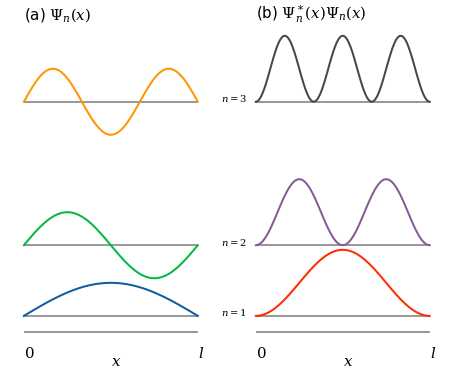

In [4]:
quantum_box1d()

已知波函数，就可用算符计算各种物理量，比如，

- (1) 粒子在 box 中的平均位置 $\langle x \rangle = \int_0^l \psi_n(x) x \psi_n(x) dx$
- (2) 粒子在 box 中的平均动量 $\langle p_x \rangle = \int_0^l \psi_n^*(x) (-i \hbar {d \over dx}) \psi_n(x) dx$
- (3) 粒子在 box 中的动量平方的均值 $\langle p_x^2 \rangle = \int_0^l \psi_n^*(x) (- \hbar^2 {d^2 \over dx^2}) \psi_n(x) dx$
- (4) 粒子在 box 中位置的涨落 $\langle x^2 \rangle - \langle x \rangle^2$, 或动量的涨落

参考章节：计算机上的积分。

## 二维无限深势阱与简并态

长宽分别为 (a, b) 的2维无限深势箱中，薛定谔方程为，

\begin{align}
- {\hbar^2 \over 2 m }\left( {\partial^2 \over \partial x^2} + {\partial^2 \over \partial y^2} \right) \psi = E \psi
\end{align}

设 $\Psi = \Psi_x(x) \Psi_y(y) $ 代入上述方程，得到,

\begin{align}
 - {\hbar^2 \over 2 m } {\partial_{xx} \Psi_x(x) \over \Psi_x(x)}  - {\hbar^2 \over 2 m } {\partial_{yy} \Psi_y(y) \over  \Psi_y(y)}  = E 
\end{align}

左边两项分别为 x 和 y 的函数，它们相加等于一个常数 $E$, 因此设它们分别等于两个常数 $E_x, E_y$ 且 $E_x + E_y = E$。

此时得到两个独立的一维无限深方势阱的薛定谔方程，解已知。

即 2 维无限深方势阱的波函数与能级为，


\begin{align}
\Psi_{n} &= \sqrt{{4 \over a b}}\sin\left( {n_x \pi x \over a}\right)\sin\left( {n_y \pi y\over b}\right),\ n_x, n_y=1, 2,3 \cdots \\
 E_{n} &= {\hbar^2 \pi^2 \over 2m}\left( {n_x^2 \over a^2} +  {n_y^2 \over b^2}\right),\ n_x, n_y=1, 2,3 \cdots \\
\end{align}

如果 $a = b$, 则
\begin{align}
E_{n} = {\hbar^2 \pi^2 \over 2m a^2}\left( n_x^2 + n_y^2 \right),\ n_x, n_y=1, 2,3 \cdots 
\end{align}

某些不同的 $n_x, n_y$ 组合具有相同的能量 $E_n$, 比如，$(n_x, n_y) = 2, 3$ 与 $3, 2$, 平方和都为 13。

实际上，对于所有的 $(n_x, n_y) = (n_1, n_2)$ 与 $(n_x, n_y) = (n_2, n_1)$, 平方和都相等。

**这种能量相同的各个状态，称为简并态**。

In [5]:
# 设 mass=1， hbar=1， a=1， 计算能级
En = []

for nx in range(1, 4):
    for ny in range(1, 4):
        energy = 0.5 * np.pi**2 * (nx**2 + ny**2)
        En.append(energy)

En = np.sort(np.array(En))

print(En)

[ 9.8696044  24.674011   24.674011   39.4784176  49.34802201 49.34802201
 64.15242861 64.15242861 88.82643961]


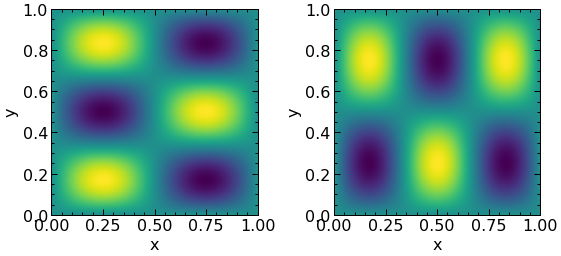

In [6]:
def plot_degenerate_wf(nx=2, ny=3, a=1):
    '''绘制简并态的波函数'''
    plt.subplot(121)
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    xx, yy = np.meshgrid(x, y, indexing='ij')
    wf = lambda x, y: 2 * np.sin(nx*np.pi*x) * np.sin(ny*np.pi*y)
    extent = (0, 1, 0, 1)
    plt.imshow(wf(xx, yy).T, extent=extent)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(122)
    plt.imshow(wf(yy, xx).T, extent=extent)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
plot_degenerate_wf()

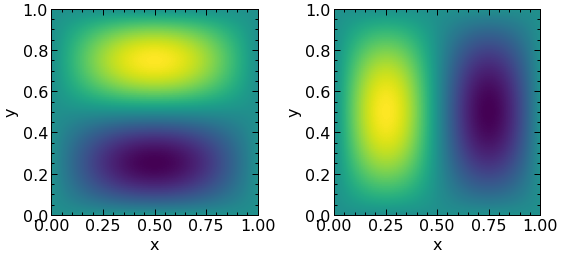

In [7]:
plot_degenerate_wf(nx=1, ny=2)

# 简并 源于对称性

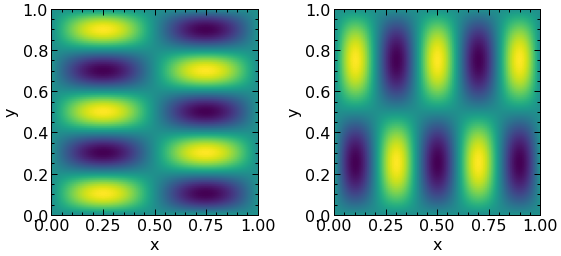

In [8]:
plot_degenerate_wf(nx=2, ny=5)

In [9]:
def check_degenerate(nx=10, ny=11):
    '''检查除 nx,ny = n1, n2 和 n2, n1 这种简并态外，是否有其他简并态'''
    # maxn is the maximum integer we should check
    maxn = int(np.sqrt(nx**2 + ny**2)) + 1
    E = nx**2 + ny**2
    deg_states = []
    
    for i in range(1, maxn):
        for j in range(1, maxn):
            if (i**2 + j**2 == E):
                deg_states.append([i, j])
    
    return deg_states


check_degenerate()

[[5, 14], [10, 11], [11, 10], [14, 5]]

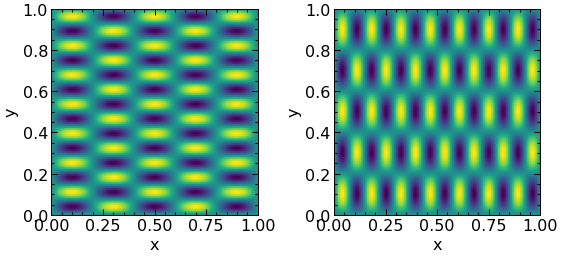

In [10]:
plot_degenerate_wf(5, 14)

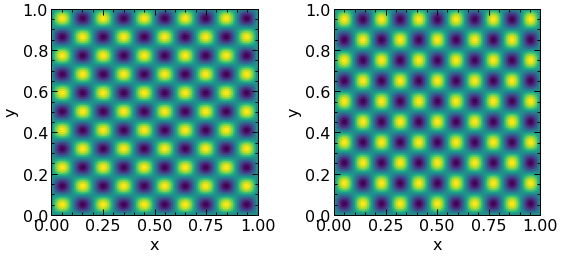

In [11]:
plot_degenerate_wf(10, 11)

In [12]:
check_degenerate(7, 9)

[[3, 11], [7, 9], [9, 7], [11, 3]]

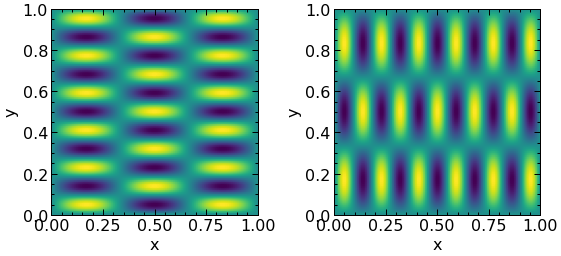

In [13]:
plot_degenerate_wf(3, 11)

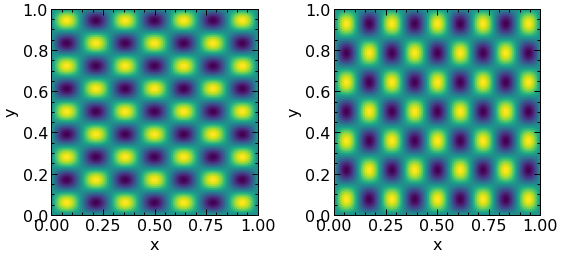

In [14]:
plot_degenerate_wf(7, 9)

#### 二维势阱的现实例子：

<img src="images/quantum_corral.jpg"></img>

IBM 发表在 《science》上的文章，Confinement of Electrons to Quantum Corrals on a Metal Surface。

使用 48 个 Fe 原子在铜金属表面上构筑“量子围栏”(Quantum Corral)，围栏内是电子的概率密度分布。

学习了本节课，原则上大家可以自己计算一下量子围栏中电子的波函数及概率密度分布。

## 高维定态薛定谔方程的数值解（矩阵方法）

上一节课介绍了使用矩阵本征值和本征向量求解一维定态薛定谔方程的方法。

这一节介绍如何向 2 维或 3 维推广。 2 维空间点上哈密顿算子的二阶微分项，

\begin{align}
\left( {\partial^2 \over \partial x^2} + {\partial^2 \over \partial y^2} \right) \psi
\end{align}

可以差分化为，

\begin{align}
\left( {\psi_{i+1, j} - 2 \psi_{i, j} + \psi_{i-1, j} \over h^2} + {\psi_{i, j+1} - 2\psi_{i, j} + \psi_{i, j-1} \over h^2} \right)
\end{align}

其中 $h = \Delta x = \Delta y $。


在二维，可以将空间离散化为等间距的格子，并展平为一维列向量 $\psi(i, j)$，
\begin{align}
\begin{bmatrix}
\psi(0,0) \\ \psi(1, 0) \\
\psi(2,0) \\ \cdots \\
\psi(n,0) \\ \psi(0, 1) \\
\psi(1, 1) \\ \cdots \\
\psi(n, n)
\end{bmatrix}
\end{align}

- 如果有 50 个离散点，列向量有 2500 个元素，哈密顿矩阵为 2500 * 2500 的方阵。
- 如果是 3 维，每个方向 50 个离散点，则哈密顿矩阵为 125000 * 125000 的方阵。

计算超大矩阵的本征值和本征向量是非常有挑战的计算物理任务。

但很多时候，只希望知道很少的几个本征值与本征函数。

此时，有一种高效的称作“幂法”（power method）的计算方法，可以有效计算超大矩阵的“最大”本征值。

比如，如果一个 $n\times n$ 矩阵 $H$ 的本征值按大小排序为，

\begin{align}
|\lambda_1| \ge |\lambda_2| \ge \cdots \ge |\lambda_n| 
\end{align}

则使用矩阵 $H$ 连续的作用在一个任意的试探向量 $\vec{u}$ 上，则会让 $\vec{u}$ 慢慢的朝最大本征向量 $\vec{u}_1$ 的
方向旋转。

试探向量 $\vec{u}$ 可以表示为所有本征向量的线性组合，

\begin{align}
\vec{u} = \sum_{i=1}^n a_i \vec{u}_i
\end{align}

因为 $\vec{u}_i$ 是 $H$ 的本征向量，所以 $H \vec{u}_i = \lambda_i  \vec{u}_i$。 将 $H$ 作用 1 次到 $\vec{u}$ 上得到，

\begin{align}
H \vec{u} = \sum_{i=1}^n a_i \lambda_i \vec{u}_i
\end{align}

此时如果将 $H$ 连续作用到 $\vec{u}$ 上 m 次，得到，


\begin{align}
H^m \vec{u} = \sum_{i=1}^n a_i \lambda_i^m \vec{u}_i = \lambda_1^m \left(a_1 \vec{u}_1 + \sum_{i=2}^{n} a_i ({\lambda_i \over \lambda_1})^m \vec{u}_i \right)
\end{align}

因为对于 $i\gt1$,  有 $|\lambda_i / \lambda_1| < 1$，所以连续作用多次后，本征值小的项都会随 $({\lambda_i \over \lambda_1})^m$ 趋近于 0。最终得到，

\begin{align}
H^m \vec{u} \approx a_1 \lambda_1^m \vec{u}_1
\end{align}

对 $H^m \vec{u}$ 做归一化处理即可得到 $\vec{u}_1$。

扩展：

1. 已知本征值上限 $\Lambda$ ，求最小本征值。此时将矩阵做平移，求 $\Lambda^2 I - H^2$ 的最大本征值
2. 对于基态波函数，对 $H^{-1}$ 使用 “幂法”。
3. 同时求几个能级和波函数

### 下面尝试使用最简单的矩阵法求解二维薛定谔方程的本征值与本征态

此时需要将 2 维波函数映射到一维向量。

In [15]:
def mapping(i, j, n=50):
    # i 列， j 行 (将 2 维波函数展平为 1 维向量)
    return j * n + i 

In [16]:
def get_hamiltonian(n=50, xmin=0, xmax=1, m=1, hbar=1):
    '''1. 2D, 50*50 array for coordinates
       2. 2D, 2500 * 2500 array for hamiltonian '''
    # 每一行保存着 H 作用在 n*n 个 psi 上的有限差分操作的系数 
    nn = n**2
    h = np.zeros(shape=(nn, nn))
    def set_value(i, j, k, l, value):
        row = mapping(i, j, n)
        col = mapping(k, l, n)
        if k >=0 and l >= 0 and k < n and l < n:
            h[row, col] = value
        
    for i in range(n):
        for j in range(n):
            set_value(i, j, i-1, j, 1)
            set_value(i, j, i, j, -4)
            set_value(i, j, i+1, j, 1)
            set_value(i, j, i, j-1, 1)
            set_value(i, j, i, j+1, 1)                
    
    dx = (xmax - xmin) / n
    h = -(hbar**2 / 2*m) * h / dx**2
            
    return h

In [17]:
hmatrix = get_hamiltonian(n=5)
# 此处可以测试 第 0， 1， 9， 12， 24 行的哈密顿矩阵元
print(hmatrix[0].reshape(5, 5))

[[ 50.  -12.5  -0.   -0.   -0. ]
 [-12.5  -0.   -0.   -0.   -0. ]
 [ -0.   -0.   -0.   -0.   -0. ]
 [ -0.   -0.   -0.   -0.   -0. ]
 [ -0.   -0.   -0.   -0.   -0. ]]


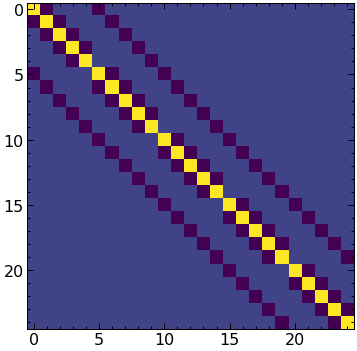

In [18]:
plt.imshow(hmatrix)

In [19]:
hmatrix.diagonal(offset=0)
#hmatrix.diagonal(offset=1)
#hmatrix.diagonal(offset=2)
#hmatrix.diagonal(offset=5)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [20]:
def eig_solve(hmatrix):
    '''解矩阵的本征值与本征向量
    并按本征值从小到大排序'''
    w, v = np.linalg.eig(hmatrix)  
    idx_sorted = np.argsort(w)     
    return w[idx_sorted], v[:, idx_sorted]

In [21]:
ndim = 50
hmatrix = get_hamiltonian(n=ndim)
evalue, evector = eig_solve(hmatrix)

In [22]:
evalue
# 从本征值上看，已经可以看到兼并的能级

array([9.48335631e+00+0.j, 2.36904040e+01+0.j, 2.36904040e+01+0.j, ...,
       9.97630960e+03+0.j, 9.97630960e+03+0.j, 9.99051664e+03+0.j])

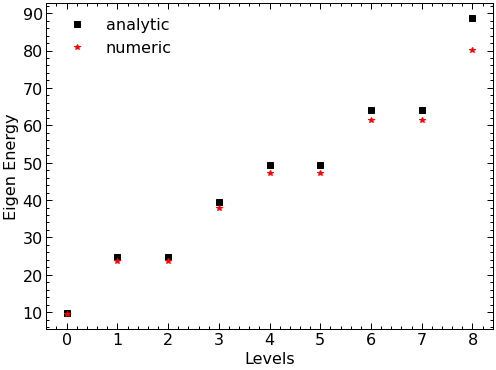

In [23]:
def compare_eigval(numeric=evalue):
    analytic = En
    num = 9
    levels = list(range(num))
    plt.plot(levels, analytic, 'ks', label='analytic')
    plt.plot(levels, numeric[:num].real, 'r*', label='numeric')
    plt.xlabel("Levels")
    plt.ylabel("Eigen Energy")
    plt.legend(loc='best')

compare_eigval()

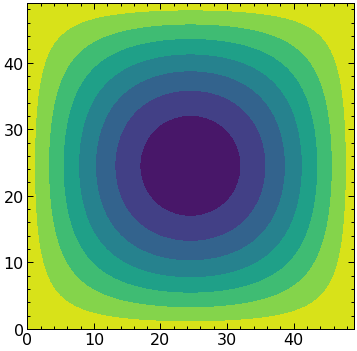

In [24]:
plt.contourf((evector[:, 0].real).reshape(ndim, ndim))
plt.gca().set_aspect('equal')
# 波函数差了一个相位，但概率密度 rho = psi* psi 相等

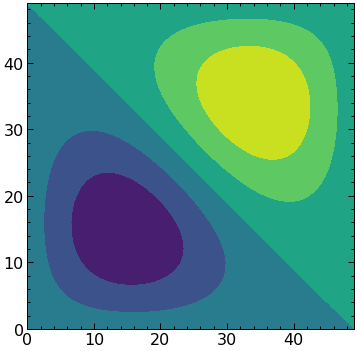

In [25]:
plt.contourf((evector[:, 1].real).reshape(ndim, ndim))
plt.gca().set_aspect('equal')

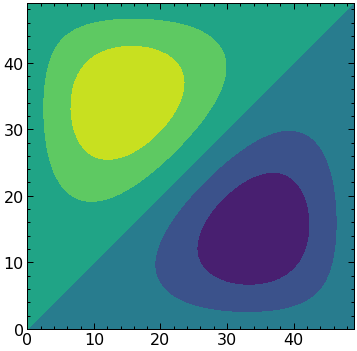

In [26]:
plt.contourf((evector[:, 2].real).reshape(ndim, ndim))
plt.gca().set_aspect('equal')

可以看到

1. 基态波函数与解析解差一个相位（波函数是解析解的-1 倍）。相位不影响物理结果。
2. 两个简并的第一激发态的波函数与之前的解析解也有所不同。但此差异仅仅是因为数值计算结果是解析波函数的线性变换。

类似于从 $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 和 $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

变换到了 ${1\over \sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}$ 和 ${1\over \sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$

两者都是正交的，第二组相当于第一组旋转了 45 度角，两者等价。

### Lanczos 算法求解基态本征值与本征向量

参考文献：ADVANCES IN NUCLEAR PHYSICS （VOLUME 9），Page 126

对于超大矩阵，使用一般的矩阵本征值求解算法非常耗时。

在大规模的多体量子计算、Lattice QCD 计算中，有一个非常常用的超大矩阵本征值与本征向量求解的算法 -- Lanczos 算法。 这个算法是“幂法”的一种。

从一个归一化的 n-维任意初始向量 $v_1$ 出发（ $\langle v_1 | v_1 \rangle = 1$），将 $n\times n$ 维厄密特算子 $H$ 连续作用 $v_1$ 上，根据 H 的厄密属性（$H^{+} = H$），可以得到一个三对角阵，

\begin{array}{l}
H v_{1}=\alpha_{1} v_{1}+\beta_{1} v_{2} \\
H v_{2}=\beta_{1} v_{1}+\alpha_{2} v_{2}+\beta_{2} v_{3} \\
H v_{3}=\quad \beta_{2} v_{2}+\alpha_{3} v_{3}+\beta_{3} v_{4}
\end{array}

此过程生成的向量会终止于 n，即 $H v_n = \beta_{n-1} v_{n-1} + \alpha_{n} v_{n}+\beta_{n} v_{n+1}$, 满足 $v_{n+1}=0$。

原因是不可能在 n 维空间中产生一个新的向量 $v_{n+1}$ 与之前的所有的正交归一向量 $v_1, \cdots, v_{n}$ 都正交。

$v_1, \cdots, v_{n}$ 形成一组正交归一的基向量（orthonormal basis），称为 Lanczos 向量。

在这组向量下，哈密顿矩阵变为 3 对角矩阵，

\begin{align}
H \rightarrow \hat{H}= \begin{bmatrix}
\alpha_1 & \beta_1 &  &\\
\beta_1 & \alpha_2 & \beta_2 & \\
& \beta_2 & \alpha_3 & \beta_3\\
& & \cdot & \cdot & \cdot\\
\end{bmatrix}
\end{align}

三对角的厄密特矩阵本征问题有很多高效的近似迭代算法。解 $\hat{H}$ 的本征值问题，能得到它的本征向量 $\vec{u}$。

原始的 $H$ 的本征向量可以通过变换 $\vec{U} = V \vec{u}$ 得到，其中 $V$ 是以 $v_1, \cdots, v_n$ 为列向量的矩阵。

In [27]:
from scipy.linalg import eigh_tridiagonal as tri_eigh
from scipy.linalg import norm
# 下面这个 Lanczos 算法修改自 https://zhuanlan.zhihu.com/p/99724468
def lanczos(hm):
    ndim = hm.shape[0]
    # alpha 保存对角元 alpha_1 到 alpha_n
    alpha = []
    # beta 保存非对角元 beta_1 到 beta_{n-1}
    beta = []
    # V 保存 v1, ..., vn 列向量
    V = []
    # 产生归一化的随机初始向量 v1
    v1 = np.random.rand(ndim)
    v1 = v1 / norm(v1)
    # hm @ v1 to produce vn = a1 v1 + b1 v2
    v2 = hm @ v1
    k=0
    while True:
        V.append(v1)
        # print(">>>Lanczos Step", k)
        a1 = v1 @ v2
        alpha.append(a1)
        if k>29:
            # eigh_tridiagonal: Solve eigenvalue problem for a real symmetric tridiagonal matrix.
            eig_value, eig_vector= tri_eigh(np.array(alpha),
                                      np.array(beta),
                                      select='i',
                                      select_range=(0, 0))
            
            if abs(b1*eig_vector[k])<1e-10:
                print(">>>lanczos Finished ")
                break
        k += 1
        v2 = v2 - a1 * v1
        b1 = norm(v2)
        beta.append(b1)
        v2 = v2 / b1
        v1, v2 = v2, -b1 * v1
        v2 = hm @ v1 + v2
    eig_value=np.double(eig_value)
    # u 是 3 对角阵 \hat{H} 的基态本征向量
    u = eig_vector
    V = np.array(V).T
    # eig_vec 是原始厄密特算符 H 的本征向量
    eig_vec = V@u
    
    return eig_value, eig_vec[:, 0]

In [28]:
eig_val, eig_vec = lanczos(hmatrix)


>>>lanczos Finished 


In [29]:
eig_val
# 基态本征值解析解： 9.869604401089358

9.483356314780407

In [30]:
eig_vec.shape

(2500,)

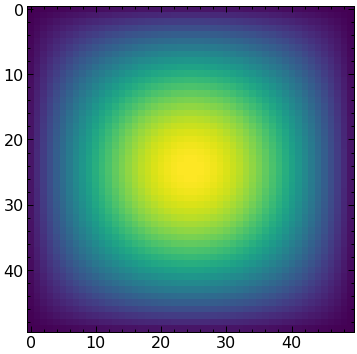

In [31]:
plt.imshow((eig_vec.real).reshape(ndim, ndim))
plt.gca().set_aspect('equal')

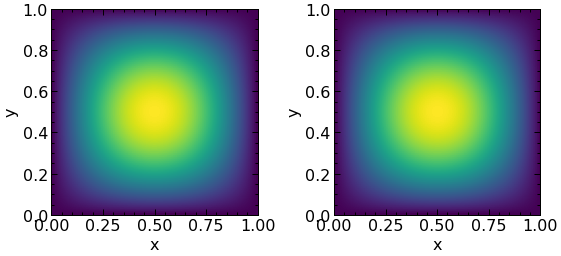

In [32]:
# 与解析解对比
plot_degenerate_wf(nx=1, ny=1)

### 基函数展开与变分法

在欧几里德空间按均匀间隔离散化，数值求解高维薛定谔方程时，很快遇到了维数灾难！

如果换种做法，对波函数进行基函数展开，则可以使用小哈密顿矩阵得到不错的解。

定态薛定谔方程 

\begin{align}
 {\hat H} |\psi(x) \rangle = E | \psi(x) \rangle
 \end{align}
 
在两边乘以 $\langle \psi(x) |$ 可以得到能量作为波函数的泛函形式，
 \begin{align}
E[\psi] = { \langle \psi(x) |{\hat H} |\psi(x) \rangle \over \langle \psi(x) | \psi(x) \rangle } = {\int dX \psi^*(X) {\hat H} \psi(x) \over \int dX \psi^*(X) \psi(X)}
 \end{align}


在变分法计算中，一般将波函数在一组正交归一基向量 $|\phi_i\rangle$ 上展开，写为，

\begin{align}
|\Psi\rangle &= \sum_{i}^N c_{i} |\phi_{i}\rangle
\end{align}

基的正交性要求 $\langle \phi_i | \phi_j \rangle = \int \phi_i^*(x) \phi_j(x) dx = \delta_{ij}$, 当 $i==j$ 时，$\delta_{ij}=1$, 否则，$\delta_{ij}=0$。

此时，能量泛函写为，

 \begin{align}
E = { \sum_{ij}^N c_i^* c_j H_{ij} \over  \sum_{ij}^N c_i^* c_j \delta_{ij}}
 \end{align}

其中 $ H_{ij} = \langle \phi_i | \hat{H} | \phi_j \rangle$。

上述泛函问题等价于线性方程组，

 \begin{align}
\sum_{ij}^N \left( H_{ij} - E \delta_{ij} \right) c_j = 0 \quad\; {\rm for \ i=1, 2, \cdots, N}
 \end{align}
 
写成矩阵本征问题的形式，
 
 \begin{align}
H c = E c
 \end{align}
 

### 数值求解二维薛定谔方程（谐振子基展开）

如果用谐振子基将二维无限深方势阱的波函数展开为，

\begin{align}
\Psi(x, y) &= \sum_{i,j}^N c_{ij} \phi_{i}(x) \phi_{j}(y)
\end{align}

其中，$N$ 是一维基的个数；一维谐振子势下波函数的解析解为，
\begin{align}
\phi_{n}(x)=\frac{1}{\sqrt{2^{n} n !}}\left(\frac{m \omega}{\pi \hbar}\right)^{1 / 4} e^{-m \omega x^{2} / 2 \hbar} H_{n}\left(\sqrt{\frac{m \omega}{\hbar}} x\right)
\end{align}

将 $c_{ij}$ 展平为 1 维列向量 $c_{n=i*N + j} = c_{ij}$，

可以得到哈密顿矩阵的矩阵元，

\begin{align}
 H_{mn} = \langle \phi_m | \hat{H} | \phi_n \rangle
\end{align}

In [33]:
from math import factorial 
from math import sqrt
import numpy as np

sqrt(factorial(50))
# np.sqrt() 函数会对 factorial(50) 报错, 
# 此处使用 math.sqrt(math.factorial)

1.743963680863606e+32

In [34]:
from scipy.special import hermite as hermite_np
from math import factorial

def ho_wf(x, n=0, m=1, omega=100, hbar=1):
    '''谐振子势下波函数的解析解'''
    coef = 1 / np.sqrt(2**n * factorial(n))
    coef = coef * (m * omega / hbar / np.pi)**0.25
    Hn = hermite_np(n)
    wf = coef * np.exp(-m*omega*x**2 / (2*hbar)) * Hn(np.sqrt(m*omega/hbar)*x)
    return wf

def basis_func(x, y, i, j, nbasis=10, m=1, omega=100, hbar=1):
    ''' 使用谐振子基构造的二维波函数
    :i: the ith basis along x
    :j: the jth basis along y
    :nbasis: num of basis along each direction
    :m: the mass 
    :omega: frequency of the harmonic osci. 
    :hbar: reduced Planck constant'''
    n = i * nbasis + j 
    # x - 0.5 将中心移动到 0.5 位置，因势阱范围在 0<x<1, 0<y<1
    phi_x = ho_wf(x-0.5, i, m, omega, hbar)
    phi_y = ho_wf(y-0.5, j, m, omega, hbar)
    if len(x) == 1:
        return phi_x * phi_y
    else:
    # 如果 x，y 是 1D 数组，则使用向量张量积，得到 2 维空间函数
        return phi_y[:, np.newaxis] * phi_x[np.newaxis, :]

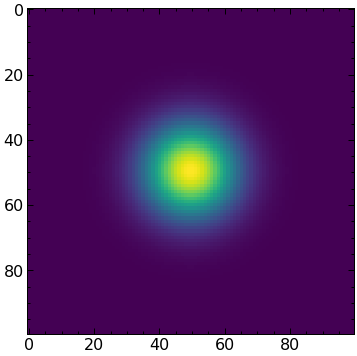

In [35]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

plt.imshow(basis_func(x, y, 0, 0))

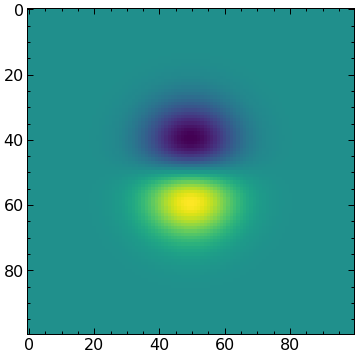

In [36]:
# nx=0, ny=1
plt.imshow(basis_func(x, y, 0, 1))

In [37]:
from sympy import hermite
from math import factorial, sqrt

def harmo_psi(x, n=0, m=1, omega=100, hbar=1):
    '''谐振子势下波函数的解析解'''
    coef = 1 / sqrt(2**n * factorial(n))
    coef = coef * (m * omega / hbar / np.pi)**0.25
    Hn = hermite(n, np.sqrt(m*omega/hbar)*x)
    wf = coef * sym.exp(-m*omega*x**2 / (2*hbar)) * Hn
    return wf

In [38]:
from sympy import symbols
from scipy.integrate import quad
import sympy as sym

def h1d(i, j, xmin=0, xmax=1, m=1, omega=100, hbar=1):
    ''' int dx phi_i*(x) H phi_j(x) '''
    x = symbols('x')
    phi_i = harmo_psi(x-0.5, i, m, omega, hbar)
    phi_j = harmo_psi(x-0.5, j, m, omega, hbar)
    fx = phi_j * sym.diff(phi_i, x, x) * (-hbar**2 / (2*m))
    
    f = lambda xi: fx.subs(x, xi)
    return quad(f, xmin, xmax)[0]
    
h1d(1, 3)

-61.2372417253758

In [39]:
def test_unitary(i, xmin=0, xmax=1, m=1, omega=100, hbar=1):
    ''' int dx phi_i*(x) H phi_j(x) '''
    x = symbols('x')
    phi_i = harmo_psi(x-0.5, i, m, omega, hbar)**2    
    f = lambda xi: phi_i.subs(x, xi)
    return quad(f, xmin, xmax)[0]

test_unitary(i=2, xmin=0, xmax=1, omega=40)

0.9982912744827905

In [40]:
store_hij = np.zeros((10, 10))

for i in tqdm(range(10)):
    for j in range(10):
        store_hij[i][j] = h1d(i, j)

100%|██████████| 10/10 [00:41<00:00,  4.18s/it]


In [41]:
store_norm = np.zeros((10))
for i in tqdm(range(10)):
    store_norm[i] = test_unitary(i, omega=100)

100%|██████████| 10/10 [00:02<00:00,  4.32it/s]


In [42]:
store_norm

array([1.        , 1.        , 1.        , 0.99999997, 0.99999963,
       0.99999673, 0.99997705, 0.99986873, 0.99937773, 0.99752772])

In [43]:
np.savetxt("stored_hij.csv", store_hij)

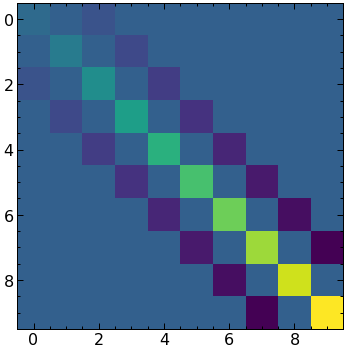

In [44]:
plt.imshow(store_hij[:10, :10])

In [45]:
def hmn_matrix_element(i, j, k, l, 
                       xmin=0, xmax=1, ymin=0, ymax=1,
                       n_basis1d=10, mass=1, omega=1, hbar=1):
    m = i * n_basis1d + j
    n = k * n_basis1d + l
    Hmn = 0.0
    if j == l: 
        norm = store_norm[j]
        Hmn += store_hij[i, k] * norm
    if i == k:
        norm = store_norm[i]
        Hmn += store_hij[j, l] * norm
    # it seems the eig_val is correct only if Hmn divide by 2    
    return m, n, Hmn/2

In [46]:
hmn_matrix_element(0, 0, 1, 0)

(0, 10, -1.0152692506945411e-15)

In [47]:
def hmn_matrix(n_basis1d=4, mass=1, omega=1, hbar=1):
    nn = n_basis1d ** 2
    H = np.zeros(shape=(nn, nn))
    
    for i in tqdm(range(n_basis1d)):
        for j in range(n_basis1d):
            for k in range(n_basis1d):
                for l in range(n_basis1d):       
                    m, n, h = hmn_matrix_element(i, j, k, l, n_basis1d=n_basis1d)
                    H[m, n] = h
    
    return H

In [48]:
Hmn = hmn_matrix(n_basis1d=6)

100%|██████████| 6/6 [00:00<00:00, 5997.57it/s]


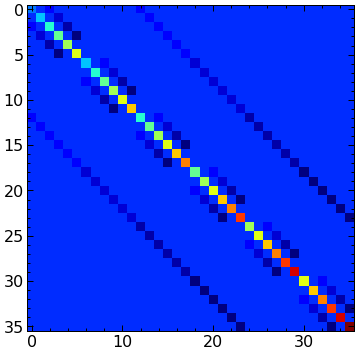

In [49]:
plt.imshow(Hmn, cmap='jet')

In [50]:
val, vec = eig_solve(Hmn)

In [51]:
val

array([  9.5081873 ,  21.41236559,  21.41236559,  33.31653894,
        49.36645945,  49.36645945,  61.27062853,  61.27062853,
        74.77388695,  74.77388695,  86.6780413 ,  86.6780413 ,
        89.22472526, 114.63211904, 114.63211904, 140.03947242,
       142.88779058, 142.88779058, 154.79193808, 154.79193808,
       180.57726937, 180.57726937, 182.74604162, 182.74604162,
       192.48138613, 192.48138613, 208.15335637, 208.15335637,
       220.43544063, 220.43544063, 245.84267647, 245.84267647,
       276.26732357, 313.95653551, 313.95653551, 351.64560224])

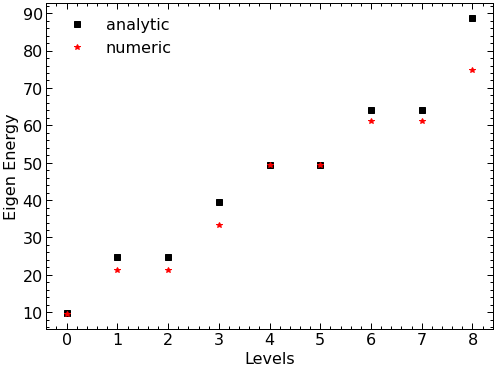

In [52]:
compare_eigval(numeric=val)

In [53]:
def wave_func(cij, n_basis1d=4, ndim=100):
    wf = np.zeros((ndim, ndim), dtype=np.complex128)
    x = np.linspace(0, 1, ndim)
    y = np.linspace(0, 1, ndim)
    for i in range(n_basis1d):
        for j in range(n_basis1d):
            m = i * n_basis1d + j
            wf += cij[m] * basis_func(x, y, i, j)
    
    return wf
            

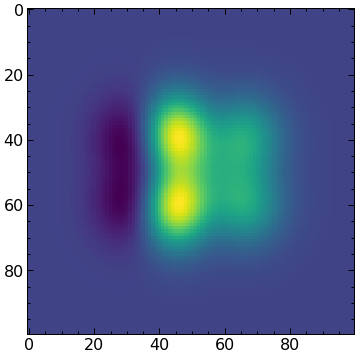

In [54]:
wf0 = wave_func(vec[:, 0])
plt.imshow(wf0.real)

## 氢原子波函数（中心势，3维）


\begin{align}
\left[ - {\hbar^2 \over 2 m }\left( {\partial^2 \over \partial x^2} + {\partial^2 \over \partial y^2} + {\partial^2 \over \partial z^2}\right) - {Z e^2 \over 4 \pi \epsilon_0 r} \right] \psi = E \psi
\end{align}

使用之前的方法，得到不同的 $n_x, n_y, n_z$ 简并态，进行简单的线性组合，就能得到 $r, \theta, \phi$ 坐标下的波函数。

或者使用之前介绍过的坐标变换法，得到 $r, \theta, \phi$ 坐标下的薛定谔方程。其解为，

\begin{align}
\psi_{n l m}(r, \theta, \phi)=R_{n l}(r) Y_{l}^{m}(\theta, \phi)
\end{align}

其中 $n$ 是主量子数，$l$ 是角动量量子数，$m$ 是磁量子数。
迳向波函数为，

$R_{n l}(r)=\left(\frac{2}{n a}\right)^{3} \frac{(n-l-1) !}{2 n\left[(n+l) !^{3}\right.} \mathrm{e}^{-r / n a}\left(\frac{2 r}{n a}\right)^{l} L_{n-l-1}^{2 l+1}\left(\frac{2 r}{n a}\right)$

归一化的球谐函数为，
$Y_{l}^{m}(\theta, \phi)= \sqrt{\frac{2 l+1}{4 \pi} \frac{(l-|m|) !}{(l+|m|) !}} \mathrm{e}^{\mathrm{i} m \phi} P_{l}^{m}(\cos \theta)$

下面对这些波函数进行一些可视化。

In [55]:
import sympy
from sympy import var
from sympy.physics import hydrogen
from sympy.physics.hydrogen import Psi_nlm
from sympy import integrate, conjugate, pi, oo, sin, diff
from sympy import symbols
from sympy.utilities.lambdify import lambdify

In [56]:
from sympy import symbols
from sympy import  sympify
n = symbols('n', real=True)
l = symbols('l', real=True)
m = symbols('m', real=True)
Z = symbols('Z', real=True, integer=True, positive=True, nozero=True)
r, phi, theta = symbols('r, phi, theta', real=True, positive=True)
wf = Psi_nlm(2, 1, 0, r, phi, theta, Z)

density = conjugate(wf) * wf
density

Z**5*r**2*exp(-Z*r)*cos(theta)**2/(32*pi)

In [57]:
def plot_psi(n=1, Z=1):
    '''visualize the wave function of H atom'''
    phi = 0
    nr, ntheta = 100, 100 
    theta_ = np.linspace(0, 2*np.pi, ntheta)
    density = np.empty(shape=(nr, ntheta))
    fig = plt.figure(figsize=((2*n+1)*4, (n+1)*4))
    rr, tt = symbols("rr, tt", real=True, positive=True)
    for l in range(n):
        r_ = np.linspace(0, 5*(l+1), nr)
        theta, rad = np.meshgrid(theta_, r_)
        for m in range(-l, l+1, 1):
            wf = Psi_nlm(n, l, m, rr, phi, tt, Z)
            #rho = conjugate(wf) * wf
            rho = wf
            rho = lambdify([rr, tt], rho, "numpy")
            density = rho(rad, theta)        
            ax = fig.add_subplot(n, 2*n-1, l*(2*n-1)+m+l+1, polar='True')
            #ax.pcolormesh(theta, rad, density, cmap='nipy_spectral')
            ax.pcolormesh(theta, rad, density, cmap='hot')
            ax.set_title("%s %s %s"%(n, l, m), size=30)
            ax.axis('off')
    plt.subplots_adjust(hspace=0.2)
    plt.show()

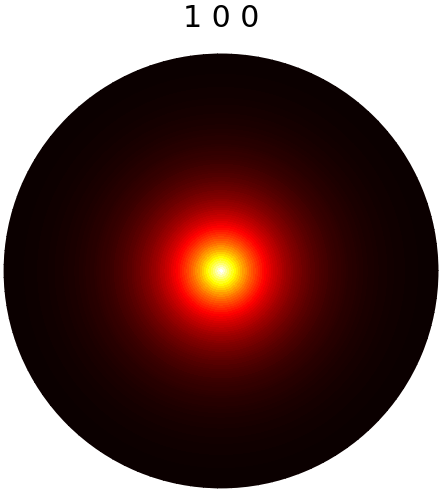

In [58]:
# n=1, 基态，无简并， 1s 态 （n l m = 1 0 0)
# 原则上我们应该画 rho = psi* psi 作为 (r, theta) 的函数
# 但这里我们直接画 psi 作为 (r, theta) 的函数
plot_psi(n=1)

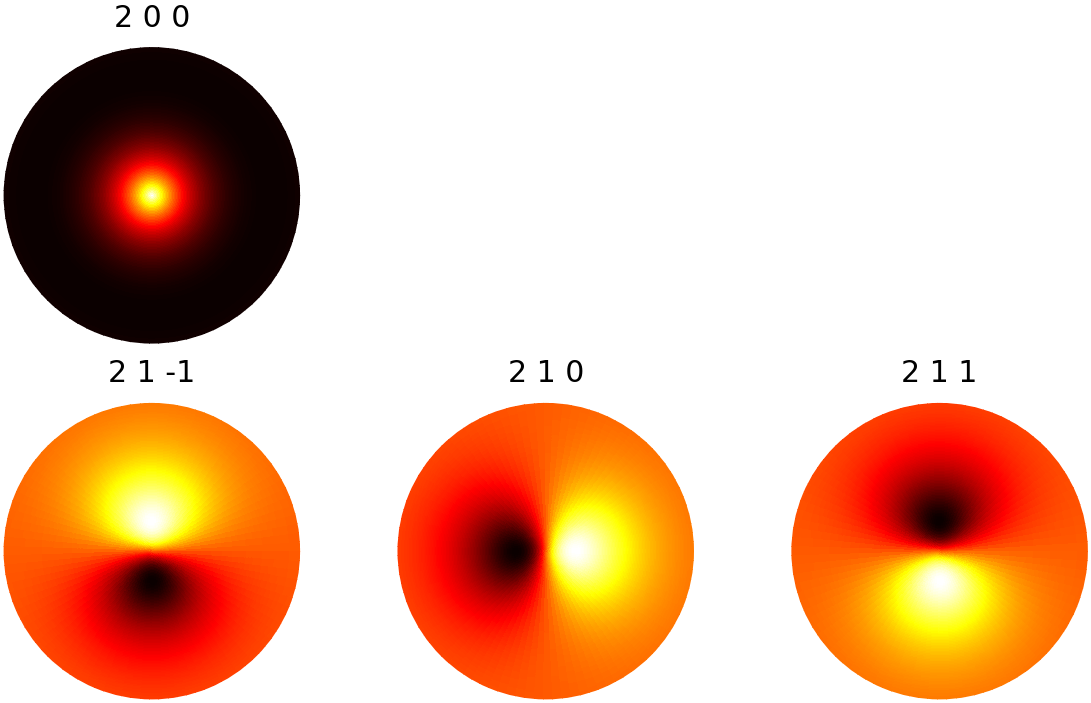

In [59]:
# n=2, 第一激发态, 2s, 2px, 2py, 2pz
plot_psi(n=2)

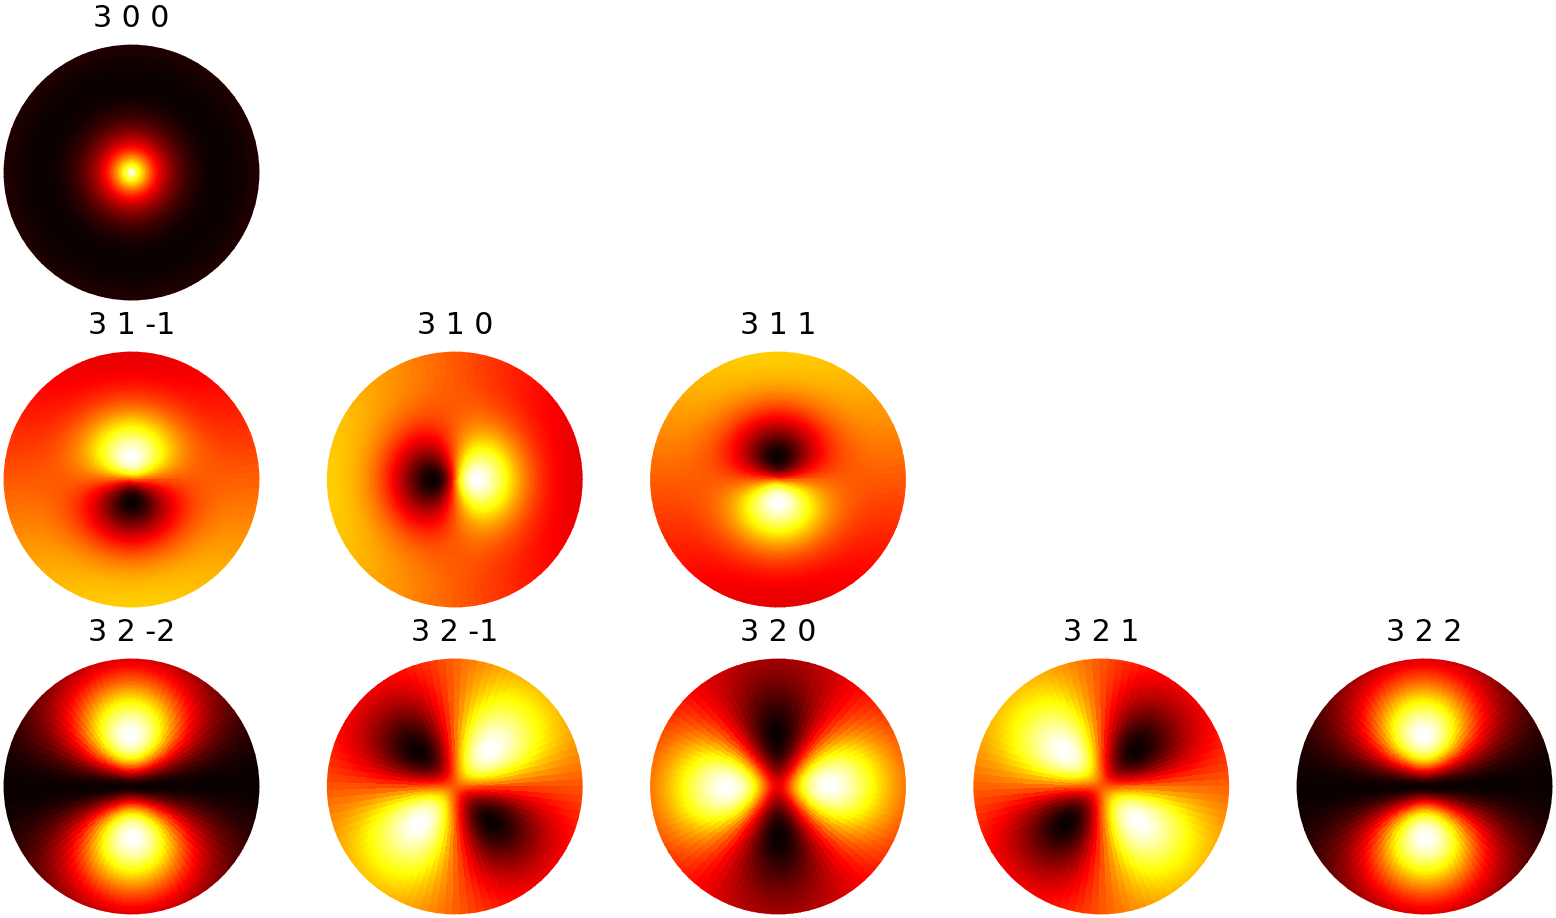

In [60]:
plot_psi(n=3)

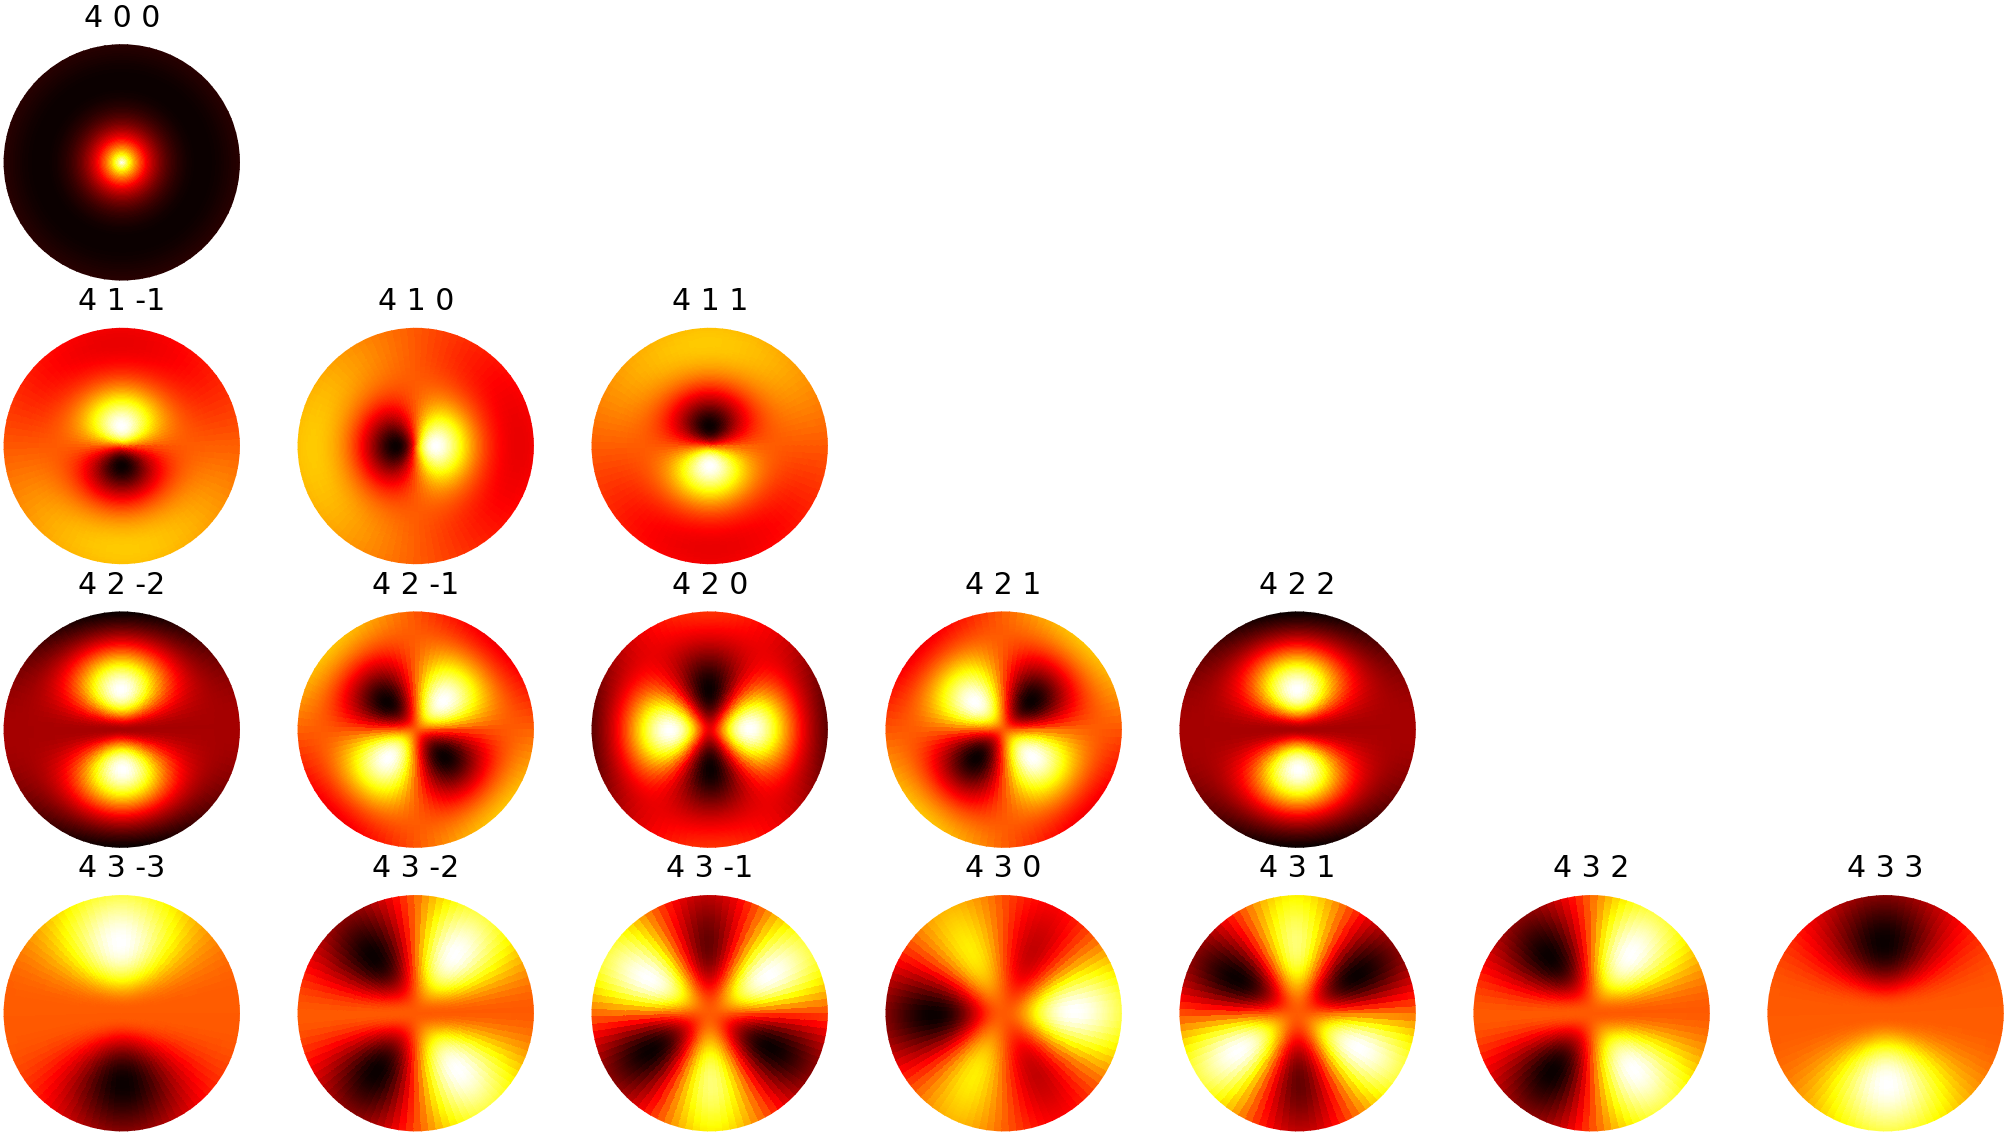

In [61]:
plot_psi(n=4)

对于氢原子来说，不考虑自旋轨道耦合，$\Psi_{nlm}$ 是哈密顿算子、角动量平方、角动量第三分量的共同本征函数，即

\begin{align}
\hat{H} \Psi_{nlm} &= E_n \Psi_{nlm} \\
\hat{l}^2 \Psi_{nlm} &= l(l+1) \Psi_{nlm} \\
\hat{l}_z^2 \Psi_{nlm} &= m \Psi_{nlm} 
\end{align}

- $l$ 的取值范围是 $0$ 到 $n-1$
- $m$ 的取值范围为 $-l, -l+1, \cdots, l-1, l$
- 同一个 n，不同的 $l,m$ 对应的能量简并，都为 $E_n$。所以 $E_n$ 的简并度为 

\begin{align}
\sum_{l=0}^{n-1} (2l + 1) = n^2
\end{align}

每个轨道态上可填充自旋向上和自旋向下的两个电子，简并度再乘以 2，变为 $2n^2$。 因此，第 n （1， 2， 3， 4， 5， 6 ...） 个能壳上可以填充的电子数为，

\begin{align}
2n^2 = 2, 8, 18, 32, 50, 72 \cdots
\end{align}

原子核也有壳层结构，实验发现当壳上的质子或中子数满足 $2, 8, 20, 28, 50, 82, 126 \cdots $ 的时候，原子核格外稳定。

这些数字被称为幻数 (Magic number)，与电子的壳模型相比，多了 $l\cdot s$ 耦合项，使得不同壳的能级发生移动。

1963 年，历史上出现第 2 个女诺贝尔物理学奖获得者 Goeppert Mayer，获奖内容为 “for their discoveries concerning nuclear shell structure”. 

<img src="images/Maria-Goeppert-Mayer.jpg"></img>


## Ab initio 多体量子计算

Ab initio 翻译成中文叫“从头算”。

这种方法一般从基本的单体-单体相互作用出发，得到多体薛定谔方程的解。

最简单的 ab initio 方法是 Hartree-Fock （HF）方法，有时又称自洽场（Self consistent field）方法。

这种方法起源于 1928 年，Hartree 发现只要原子或分子轨道上有两个电子，因为它们之间的库伦排斥力，
薛定谔方程不存在精确的解析解。

比如，对于 He 原子 （原子核中两个质子，两个中子，核外两个电子），薛定谔方程为，

\begin{align}
\left[ - {h^2 \over 8\pi^2 m }(\nabla_1^2 + \nabla_2^2) - {Z e^2 \over 4 \pi \epsilon_0 r_1} - {Z e^2 \over 4 \pi \epsilon_0 r_2} + { e^2 \over 4 \pi \epsilon_0 r_{12}} \right] \Psi = E \Psi
\end{align}

括号中的哈密顿量分别表示两个电子的动能，它们在原子核库伦场中的势能，以及电子电子的库伦排斥势能。

使用自然单位制，

\begin{align}
\hbar &= c = 1 \\
\hbar c &= 0.19732 GeV \cdot fm = 1\\
h &= 2 \pi \hbar = 2 \pi \\
\alpha &= {e^2 \over 4\pi \epsilon_0} = {1 \over 137}
\end{align}

可以大大简化上述 He 原子的薛定谔方程，

\begin{align}
\left[ - {1 \over 2 m }\left(\nabla_1^2 + \nabla_2^2\right) - {Z \alpha \over r_1} - {Z \alpha \over r_2} + { \alpha \over r_{12}} \right] \Psi = E \Psi
\end{align}

**Hartree** 方法：

Hartree 猜测多电子波函数可以写成多个单电子波函数的乘积，


\begin{align}
\Psi_0 = \phi_0(1) \phi_0(2) \phi_0(3) \cdots \phi_0(n)
\end{align}

其中 
- $\Psi_0$ 中的 0 表示这是初始的猜测波函数，后面会按照 Hartree 迭代过程逐步微调。
- $\phi_0(i)$ 是第 i 个电子坐标的函数
- Hartree 迭代过程：
  1. 解第 1 个电子的单电子薛定谔方程，电子-电子排斥来自第 1 个电子和其余电子的平均电场（通过波函数 $\phi_0(2), \phi_0(3) \cdots$计算）。
  2. 更新过第 1 个电子后，解平均场中第 2 个电子的单电子薛定谔方程
  3. 遍历所有电子，得到第一个循环后的 Hartree 波函数

\begin{align}
\Psi_1 = \phi_1(1) \phi_1(2) \phi_1(3) \cdots \phi_1(n)
\end{align}

重复上述过程 n 次，直到第 n 次的波函数 $\Psi_n$ 和（或）能量 $E_n$ 与前一轮相比，改变量可忽略不计。

这时，称波函数或能量与前一次计算自洽，因此 HF 方法又称 自洽场（self-consistent-field)方法。

**Fock** 的改进：

Hartree 方法有两个缺陷：

1. Hartree 波函数中每个电子的波函数只是空间坐标的函数，与电子的自旋无关。
2. 电子是费米子，多电子波函数应该满足交换反对称

如果考虑了自旋，定义自旋轨道为空间轨道 (spatial orbital) 与自旋波函数 $\alpha$ 和 $\beta$ 的乘积。

与一个给定的空间轨道对应的两个自旋轨道波函数为，

\begin{align}
\phi({\rm spin\ \alpha}) = \phi({\rm spatial})\alpha = \phi(x, y, z)\alpha\\
\phi({\rm spin\ \beta}) = \phi({\rm spatial})\beta = \phi(x, y, z)\beta
\end{align}

根据 $\hat{H} \phi = E \phi$, 与自旋波函数对应的算符为 $\hat{S}_z$, 写成本征方程的形式，


\begin{align}
\hat{S}_z \alpha &= {\hbar \over 2} \alpha \\
\hat{S}_z \beta &= - {\hbar \over 2} \beta
\end{align}

大家一般把 $\alpha$ 态称为 spin up 态, $\beta$ 称为 spin down 态，

\begin{align}
\hat{S}_z &= {\hbar \over 2} \sigma_z = {\hbar \over 2}  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \\
\alpha &=  \begin{bmatrix} 1 \\ 0 \end{bmatrix}\quad\;  \beta = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\end{align}

每个全同费米子只能占据一个自旋轨道态，对于 He 原子的两个电子来说，如果它们占据两个自旋轨道态，标记为 a 和 b，

则如下这样的定义满足交换反对称，

\begin{align}
\Psi(1, 2) = {1 \over \sqrt{2}} \left( \phi_a(1) \phi_b(2) - \phi_a(2) \phi_b(1) \right)
\end{align}

交换两个电子的自旋轨道态，波函数变为 

\begin{align}
\Psi(2， 1) = {1 \over \sqrt{2}} \left( \phi_a(2) \phi_b(1) - \phi_a(1) \phi_b(2) \right) = - \Psi(1, 2)
\end{align}

其中 ${1 \over \sqrt{2}}$ 是归一化因子。

根据行列式的计算法则 

\begin{align}
\begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc
\end{align}

可以将交换反对称的两电子波函数写成 Determinant 的形式，

\begin{align}
\Psi(1, 2) &= {1 \over \sqrt{2}} \left( \phi_a(1) \phi_b(2) - \phi_a(2) \phi_b(1) \right) \\
           &= {1 \over \sqrt{2}} \begin{vmatrix} \phi_a(1)  & \phi_b(1) \\ \phi_a(2)  & \phi_b(2) \end{vmatrix} 
\end{align}

这种方法可以向多体推广，使用行列式构造交换反对称的多体量子波函数，

\begin{align}
\Psi = {1 \over \sqrt{n!}} \begin{vmatrix} \phi_1(1)  & \phi_2(1) & \cdots &\phi_n(1) \\
                                           \phi_1(2)  & \phi_2(2) & \cdots &\phi_n(2) \\
                                           \vdots     & \vdots    & \vdots & \vdots  \\
                                           \phi_1(n)  & \phi_2(n) & \cdots & \phi_n(n) \\
                                           \end{vmatrix} 
\end{align}

其中下标中 $1,2,\cdots, n$ 表示 n 个自旋轨道态，括弧中的 $1, 2, \cdots, n$ 表示不同的粒子。

第一行表示第一个粒子分别处在 n 个不同的自旋轨道态上。

这种行列式被称作 Slater Determinant。

与 Hartree 相比，Fock 在猜测波函数中加入了多体费米子波函数必须满足的交换反对称，大大提高了计算精度。

对于 He 原子的两电子波函数来说，如果没有 Fock 项，则两电子间的库伦排斥力为，

\begin{align}
J_{ij} = \int \phi_i^*(1) \phi_j^*(2) \left( {1 \over r_{12}}\right) \phi_i(1) \phi_j (2) dv_1 dv_2
\end{align}

而 Fock 波函数会引入下面的库伦积分，

\begin{align}
K_{ij} = - \int \phi_i^*(2) \phi_j^*(1) \left( {1 \over r_{12}}\right) \phi_i(1) \phi_j (2) dv_1 dv_2
\end{align}

这一项绝对值比 $J_{ij}$ 小，提供了微弱的吸引力！这是对电子云形成的库伦排斥的量子修正。

一般自旋轨道态个数 M 远大于电子的个数 N，HF 方法只考虑一个 Slater Determinant。即 N 个电子占据 N 个自旋轨道的一种可能性。

这种占据可以用二次量子化的方式写出，比如，假设 2 个电子占据了从右边数第3和第5个自旋轨道态，则 Slater Determinant的等价写法是，

\begin{align}
|\Psi \rangle = |101000\rangle 
\end{align}

HF方法基于平均场近似，波函数因子化为单粒子波函数的乘积，忽略了很多关联信息。

## Post-Hartree-Fock 方法

如果以 HF 态为基准，在此基础上，通过单粒子，两粒子和多粒子激发，来产生新的 Slater Determinant，
构造多个 Slater Determinant 的叠加态，从而更加精确的计算粒子粒子关联，称作 Post-HF 方法。

Post-HF 方法有 Configuration interaction 和 Coupled cluster 等方法。

比如 Full Configuration Interaction 方法, 考虑了 N 个粒子占据 M 个自旋轨道态的所有可能性，$C_{M}^{N} = {M! \over N!(N-M)!}$.

\begin{aligned}
\left|\psi_{\mathrm{FCI}}\right\rangle = \left(I+\sum_{i, \alpha} C_{i \alpha} a_{i}^{\dagger} a_{\alpha}+\sum_{i, j, \alpha, \beta} C_{i j \alpha \beta} a_{i}^{\dagger} a_{j}^{\dagger} a_{\alpha} a_{\beta}+\ldots\right)\left|\psi_{\mathrm{HF}}\right\rangle
\end{aligned}

当然，在激发时需要选择激发后的总角动量与激发前的总角动量相等的那些自旋轨道。

$a_{\alpha}$ 表示从占据的自旋轨道态 $\alpha$ 上湮灭一个粒子，$a_{i}^{\dagger}$ 表示在未被占据的自旋轨道态 $i$ 上产生一个粒子。

Full Configuration Interaction 考虑了太多可能性，在量子计算机实用化之前，很难推广到大的系统。

另一种简化一点的思路是，只考虑单粒子激发、两粒子激发或三粒子激发这样的 Configurations，称为 Coupled Cluster 方法。

\begin{align}
\left|\psi_{\mathrm{CC}}\right\rangle=e^{T}\left|\psi_{\mathrm{HF}}\right\rangle
\end{align}

其中 $T = \sum_i T_i$,

\begin{aligned}
T_{1} &=\sum_{i \in v i r t, \alpha \in o c c} t_{i \alpha} a_{i}^{\dagger} a_{\alpha} \\
T_{2} &=\sum_{i, j \in v i r t, \alpha, \beta \in o c c} t_{i j \alpha \beta} a_{i}^{\dagger} a_{j}^{\dagger} a_{\alpha} a_{\beta}
\end{aligned}

$virt$ 表示 M-N 个未被占据的自旋轨道态，$occ$ 表示 HF 参考系统占据的自旋轨道态。

### 密度泛函方法

在传统的量子多体计算中，如果有 n 个电子，则波函数的空间维数为 $3 n$，这导致了量子多体计算时的维数灾难，

\begin{align}
\Psi(x_1, y_1, z_1, x_2, y_2, z_2, \cdots, x_n, y_n, z_n)
\end{align}

密度泛函理论（Density functional theory - DFT) 基于 Hohenberg-Kohn 的两个定理，

1. 原子与分子的基态性质完全由它们的电子密度 $\rho(x, y, z)$ 决定 -- 维数从 3n 降低到了 3！
2. 如果密度泛函构造准确，那么 $E[\rho(r)]$ 总是大于或等于基态能量，且等于号发生在基态电子密度$\rho(r)=\rho_0(r)$ 时 


### DFT 中的 “密度” （Density）

根据波恩解释，r 处粒子的概率密度等于单粒子波函数的平方， 

\begin{align}
\rho(r) = | \Psi|^2 = \Psi^*(r) \Psi(r)
\end{align}

如果波函数为多粒子波函数，密度等于对其中 n-1 个粒子坐标（或者自旋轨道态）的积分

\begin{align}
\rho(r) = \int d r_{2} d r_{3} \cdots d r_{n} \Psi^*(r, r_2, r_3, \cdots, r_n) \Psi(r, r_2, r_3, \cdots, r_n)
\end{align}

### DFT 中的“泛函” （Functional）

泛函 （Functional）是函数的函数，并返回一个数值。之前介绍过的泛函的例子包括，

1. 定积分 $I[f(x)] = \int_0^1 f(x) dx$, 返回一个数字，结果依赖于被积函数
2. 损失函数 $L[f(x, \theta)] = \sum_{i} ||y_i - f(x_i, \theta)||^2$, 结果依赖于参数化的函数 $f(x, \theta)$

**密度泛函**：能量是电子密度分布 $\rho(r)$ 的泛函，不同的 $\rho(r)$ 给出不同的总能量

\begin{align}
E = E[\rho(r)] 
\end{align}

对于原子分子系统，系统的总能量可以分解为电子的动能，电子与原子核的库伦吸引势能，电子电子的库伦排斥势能，

\begin{align}
E[\rho(r)] = \langle T[\rho(r)] \rangle + \langle V_{Ne}[\rho(r)] \rangle + \langle V_{ee}[\rho(r)]\rangle 
\end{align}

- 这里每一项都是一个泛函
- $\langle \rangle$ 表示这些项是量子力学的平均值或期望值

电子与原子核的势能泛函可以写作，
\begin{align}
 \langle V_{Ne}[\rho({\bf r})] \rangle = \int \rho({\bf r}) v({\bf r}) d{\bf r}
\end{align}

其中 $v(r)$ 是原子核提供的外部库伦势。

动能项可以用类似于 HF 方法得到的单电子密度分布，加上一个修正项 $T_{ref} + \Delta_T$。

电子电子相互作用泛函写为经典的库伦相互作用加量子修正 $\Delta_{V}$，

\begin{align}
 \langle V_{ee}[\rho({\bf r})] \rangle = {1 \over 2}\int\int {\rho({\bf r_1}) \rho({\bf r_2}) \over {\bf r_{12}}} d{\bf r_1}d{\bf r_2} + \Delta_V
\end{align}

将两个修正项放一起，定义为"交换关联能“(Exchange-correlation energy)，$E_{xc} = \Delta_T + \Delta_V$, 则最终的能量密度泛函写为，

\begin{align}
 E[\rho(r)] =  \langle T_{ref}\rangle + \int \rho({\bf r}) v({\bf r}) d{\bf r} +  {1 \over 2}\iint {\rho({\bf r_1}) \rho({\bf r_2}) \over {\bf r_{12}}} d{\bf r_1}d{\bf r_2} + E_{xc}[\rho(r)]
\end{align}


$\langle T_{ref}\rangle$ 和电子密度都是通过求解 Kohn-Sham 方程得到，


\begin{align}
\left[ - {1 \over 2 m }\nabla_i^2 -\sum_{\rm nuclei\ A} {Z \alpha \over r_{1A}}  + \int{ \alpha \rho(r_2) \over r_{12}} dr_2 + v_{xc}(1) \right] \Psi_i^{KS}(1) = \epsilon_i^{KS} \Psi_i^{KS}(1)
\end{align}

其中 $v(r) \equiv {\delta E_{xc}[\rho(r)] \over \delta \rho(r)}$ 是交换关联能的泛函微分。

假设有 2n 个电子，则电子密度和动能项分别为，

\begin{align}
\rho(r) &= \sum_i^{2n} |\Psi_i^{KS}(1)|^2 \\
\langle T_{ref}\rangle &= -{1 \over 2m} \sum_i^{2n} \langle \Psi_i^{KS}(1)|\nabla_i^2|\Psi_i^{KS}(1)\rangle
\end{align}

DFT 计算中最麻烦的项是交换关联能，发展出众多的经验公式。最近有通过深度神经网络，在大量的数据上，通过训练学习交换关联能的函数形式。

### 核多体计算

原子核比原子（分子）的电结构更加复杂。原因有很多，

1. 裸的核核相互作用势能非常复杂（Yukawa势 + 强的自旋轨道耦合 + 同位旋项 + 张量势 + 三核子相互作用）
2. 原子核是自束缚系统，不像电子可以使用波恩-奥本海默近似（假设原子核不动，只计算电子波函数）

比如广泛使用的 AV18 唯相势，https://journals.aps.org/prc/pdf/10.1103/PhysRevC.51.38 或 https://arxiv.org/abs/nucl-th/9408016， 展开后有 18 项，


\begin{align}
v_{i j}=\sum_{p=1,18} v_{p}\left(r_{i j}\right) O_{i j}^{p}
\end{align}

前 14 项对应的算符为，

\begin{align}
\begin{aligned} O_{i j}^{p=1,14}=& 1, \boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}, \boldsymbol{\sigma}_{i} \cdot \boldsymbol{\sigma}_{j},\left(\boldsymbol{\sigma}_{i} \cdot \boldsymbol{\sigma}_{j}\right)\left(\boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}\right), S_{i j}, S_{i j}\left(\boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}\right), \mathbf{L} \cdot \mathbf{S}, \mathbf{L} \cdot \mathbf{S}\left(\boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}\right) \\ & L^{2}, L^{2}\left(\boldsymbol{\tau}_{i} \cdot{\boldsymbol{\tau}}_{j}\right), L^{2}\left(\boldsymbol{\sigma}_{i} \cdot \boldsymbol{\sigma}_{j}\right), L^{2}\left(\boldsymbol{\sigma}_{i} \cdot \boldsymbol{\sigma}_{j}\right)\left(\boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}\right),(\mathbf{L} \cdot \mathbf{S})^{2},(\mathbf{L} \cdot \mathbf{S})^{2}\left(\boldsymbol{\tau}_{i} \cdot \boldsymbol{\tau}_{j}\right) \end{aligned}
\end{align}

后几项对应的算符为，$O_{i j}^{p=15,18}=T_{i j},\left(\sigma_{i} \cdot \sigma_{j}\right) T_{i j}, S_{i j} T_{i j},\left(\tau_{z i}+\tau_{z j}\right)$。其中 $T_{i j}=3 \tau_{z i} \tau_{z j}-\tau_{i} \cdot \tau_{j}$。


除了 AV18 这种通过拟合实验数据得到的维象势，市面上还存在一些其他的方法，得到核核相互作用势，

- 手征有效场论的方法，拟合数据，得到核核两体与三体相互作用势能
- 密度泛函方法，拟合数据，得到多体环境中（介质中）核子-核子相互作用势能

核多体计算中，常用的方法包括

1. 密度泛函 DFT 与协变密度泛函（中重核，基态能量与波函数）$O(n^3）$
2. QRPA 准粒子随机相近似 （加入了激发态）
3. Shell model（closed shell 与 no-core shell model），难以推广到重核 $O(exp(n))$
4. Coupled Cluster, 单粒子激发(CCS), 双粒子激发(CCD), 同时包括单粒子双粒子激发 (CCSD), 包含三粒子激发 (CCSDT), 复杂度 $O(n^7)$
5. 格林函数蒙特卡洛 GFMC, 耗散蒙特卡洛 (Diffusion Monte Carlo)
6. Similarity Renomalization Group (SRG)
7. ...